In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import os

In [49]:
def get_random_sentences(df, src, tgt, label='norm_dist'):
    bins = df.sort_values(label).bin.unique().tolist()
    sents = {}
    for b in bins:
        print(f'{b.left}-{b.right}\n')
        sampled = df[df['bin'] == b].sample(n=3)
        sents[b] = []
        for hu_idx, en_idx, sim in zip(sampled.src_idx,sampled.tgt_idx, sampled[label]):
            print(f'\t{sim}')
            print('\t' + src[hu_idx])
            print('\t' + tgt[en_idx])
            print('')
            sents[b].append((src[hu_idx], tgt[en_idx]))
    return sents

In [50]:
def plot_2x2_hist(run, key):
    fig, axs = plt.subplots(2, 2, sharex='all', sharey='all')
    for i, (name, df) in enumerate(dataframes[run].items()):
        x = i % 2
        y = (i // 2) % 2
        df[key].plot.hist(bins=40, xticks=[0.0,0.1, 0.2, 0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0],
                                     yticks=range(0, 100, 10), ax=axs[x,y], figsize=(12,8))
        axs[x, y].set_title(name)
    fig.tight_layout()
    axs[1, 0].sharex(axs[0, 0])

def plot_2x2_2hist(run1, run2, key1, key2):
    plt.style.use('seaborn-deep')
    fig, axs = plt.subplots(2, 2, sharex='all', sharey='all', figsize=(12,8))
    for i, name in enumerate(dataframes[run1].keys()):
        x = i % 2
        y = (i // 2) % 2
        
        df1 = dataframes[run1][name]
        df2 = dataframes[run2][name]
        
        #axs[x, y].hist(df1[key1], bins=40, alpha=0.5, label=run1)
        #axs[x, y].hist(df2[key2], bins=40, alpha=0.5, label=run2)
        
        axs[x, y].hist([df1[key1], df2[key2]], bins=20, label=[run1,run2])

        axs[x, y].set_title(name)
        axs[x, y].set_xticks([0.0,0.1, 0.2, 0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])
        axs[x, y].set_yticks(range(0, 220, 20))
        axs[x, y].legend(loc='upper right')
    axs[1, 0].sharex(axs[0, 0])
    fig.tight_layout()

In [51]:
root_dir = '/home/dorka/BME/nmt/graph_test'
hu_sent_file = '/home/dorka/BME/nmt/graph_test/sampled-1000.hu'
en_sent_file = '/home/dorka/BME/nmt/graph_test/sampled-1000.en'

base_dirs = next(os.walk(root_dir))[1]

filenames = {}
dataframes = {}

for base_dir in base_dirs:
    filenames[base_dir] = {}
    dataframes[base_dir] = {}
    for file in os.listdir(os.path.join(root_dir, base_dir)):
        name = file.replace('-', '_')[:-4]
        filename = os.path.join(root_dir, base_dir, file)
        filenames[base_dir][name] = filename
        dataframes[base_dir][name] = pd.read_csv(filename, sep=',')
        key = 'norm_dist' if 'norm_dist' in dataframes[base_dir][name] else 'jaccard'
        dataframes[base_dir][name]['bin'] = pd.cut(dataframes[base_dir][name][key], 5)       
        
        
with open(hu_sent_file, 'r') as f:
    hu_sents = f.readlines()
    hu_sents = [s.rstrip() for s in hu_sents]
with open(en_sent_file, 'r') as f:
    en_sents = f.readlines()
    en_sents = [s.rstrip() for s in en_sents]     

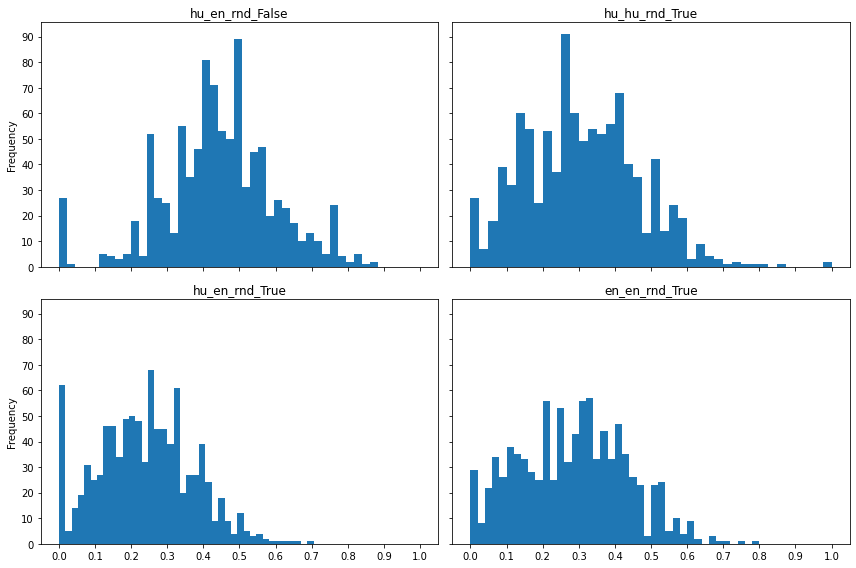

In [52]:
plot_2x2_hist('ged-2', 'norm_dist')

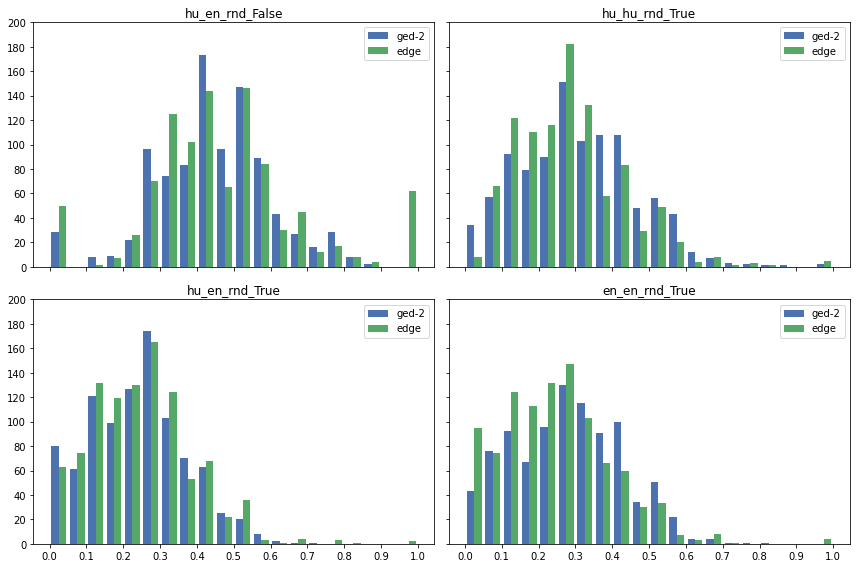

In [53]:
plot_2x2_2hist('ged-2', 'edge', 'norm_dist', 'jaccard')

In [54]:
with open(hu_sent_file, 'r') as f:
    hu_sents = f.readlines()
    hu_sents = [s.rstrip() for s in hu_sents]
with open(en_sent_file, 'r') as f:
    en_sents = f.readlines()
    en_sents = [s.rstrip() for s in en_sents]

# GED

## hu-en random pairs

<AxesSubplot:ylabel='Frequency'>

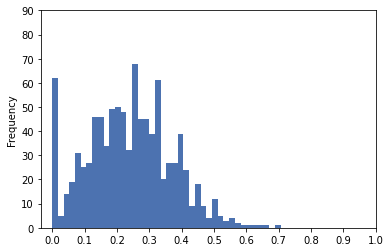

In [55]:
dataframes['ged-2']['hu_en_rnd_True'].norm_dist.plot.hist(bins=40, xticks=[0.0,0.1, 0.2, 0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0],
                             yticks=range(0, 100, 10))

In [56]:
huen_rnd_sents = get_random_sentences(dataframes['ged-2']['hu_en_rnd_True'], hu_sents, en_sents)

-0.000706-0.141

	0.1
	3. cikk
	(b) where applicable, the locality or constituency in his home Member State on the electoral roll of which his name was last entered, and

	0.06666666666666668
	-Bosszant a csajod.
	Phoebe said to herself, How pleasant he can be!

	0.045454545454545456
	Szörnyű zűrzavar volt benn; szétszórt tányérok, felforgatott asztalok, a szolgálólányok sikolyai és a tűz üvöltő lobogása.
	Article 14

0.141-0.282

	0.2352941176470588
	Azt már nem mondta ki, hogy bármi légyen is, ami ott él a tóban, a társaság tagjai közül elsősorban Frodót ragadta meg.
	Ill outlive them all, he crowed.

	0.2
	Hallorann eleget repült életében ahhoz, hogy el tudja képzelni, mi történt.
	But something odd was happening.

	0.19444444444444445
	Soha nem látták viszont Rumfoordot és a kutyáját.
	The bar exam was a nuisance, an ordeal that must be endured, a rite of passage, and nothing any Harvard man should fear.

0.282-0.424

	0.375
	ELFOGADTA EZT A RENDELETET:
	What cousin?

	0.375
	Vagy 

## hu-en translated pairs

<AxesSubplot:ylabel='Frequency'>

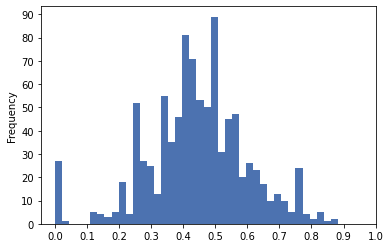

In [57]:
dataframes['ged-2']['hu_en_rnd_False'].norm_dist.plot.hist(bins=40, xticks=[0.0,0.1, 0.2, 0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0], 
                         yticks=range(0, 100, 10))

In [58]:
huen_sents = get_random_sentences(dataframes['ged-2']['hu_en_rnd_False'], hu_sents, en_sents)

-0.000882-0.176

	0.0
	National Audit Office
	National Audit Office

	0.1111111111111111
	Meg egy takarítóbrigádot.
	Its so very pretty.

	0.0
	2.3.4.1.3.
	2.3.4.1.3.

0.176-0.353

	0.3333333333333333
	FREDDY
	FREDDY.

	0.3142857142857143
	A múltban nagy ritkán tüneményszerűen lépett fel az ilyen eset, és általánosan a halállal tévesztették össze.
	It has been a rare phenomenon in the past and has constantly been mistaken for death.

	0.25
	5. cikk
	Article 5

0.353-0.529

	0.3968253968253968
	Talán valami szupravezetőben keringett félelmes áram gondolta néhány szakember -, az őrizte meg az energiát évmilliókon át, amíg kellett, amíg az energia gerjesztette sikoly föl nem hangzott.
	Perhaps, some experts theorized, it had been generated by a tremendous circulating current, flowing in a superconductor and thus carrying energy down the ages until it was needed.

	0.4074074074074074
	A vezetőfülke hátoldalában elhelyezkedő elektromos berendezések szerkezete és védelme: 14.2.
	Construction

## hu random pairs

<AxesSubplot:ylabel='Frequency'>

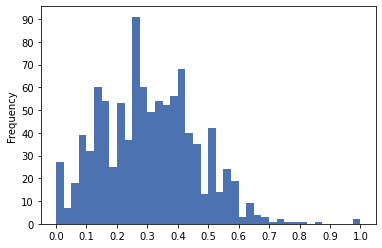

In [59]:
dataframes['ged-2']['hu_hu_rnd_True'].norm_dist.plot.hist(bins=40, xticks=[0.0,0.1,0.2, 0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0], 
                           yticks=range(0, 100, 10))

In [60]:
hu_rnd_sents = get_random_sentences(dataframes['ged-2']['hu_hu_rnd_True'], hu_sents, hu_sents)

-0.001-0.2

	0.16666666666666666
	S 9 Az edényzet jól szellőztethető helyen tartandó
	Igen, kapitány.

	0.08333333333333333
	Bill Ralph elé lépett.
	d) állatoknak szánt magisztrális készítmények.

	0.08
	Fel kell jegyezni az elpusztulás időpontját, valamint azt az időpontot, amikor a toxikus hatás jelei mutatkozni kezdenek, illetve elmúlnak.
	K/10 Öntözőberendezések

0.2-0.4

	0.3636363636363637
	[cccxxv] Angolban az eredeti szöveg.
	­ hüppögte.

	0.2727272727272727
	A Kakrafoon napja időközben hatalmasra hízott az ernyőn.
	Jelszó:

	0.35714285714285715
	Ha szerencséjük van, senki sem hal meg.
	hatása a nem célszervezetekre;

0.4-0.6

	0.42105263157894735
	Amíg az SPG-51-es rakétafelderítő radar működik és sugároz, a Harm radarelhárító rakéta gyakorlatilag garantáltan célba talál.
	Az ernyő túloldalán, körülbelül két méter távolságban ül vagy áll, vagy tudom is én, mit csinál.

	0.4390243902439024
	A tea keserű maradt, ugyanakkor émelyítő lett, de Will csak elkortyolgatta.
	6. ha a két

## en random pairs

<AxesSubplot:ylabel='Frequency'>

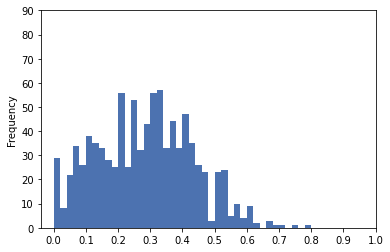

In [61]:
dataframes['ged-2']['en_en_rnd_True'].norm_dist.plot.hist(bins=40, xticks=[0.0,0.1, 0.2, 0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0], 
                           yticks=range(0, 100, 10))

In [62]:
en_rnd_sents = get_random_sentences(dataframes['ged-2']['en_en_rnd_True'], en_sents, en_sents)

-0.0008-0.16

	0.045454545454545456
	Teg was forced to admit that walking the wild places of Gammu created a whole new perspective for him.
	Article 1

	0.13333333333333333
	Farewell, Appalachia!
	(f) be made out for a single consignee.

	0.1111111111111111
	A surge of excitement rushed through Jerle Shannara, and he redoubled his efforts to break through the enemy soldiers confronting him.
	Article III-142

0.16-0.32

	0.24242424242424246
	And there we go.
	Hes just wiped out his only opponent, before a national audience, and hes finally convinced that his name will be on the ballot in November.

	0.2
	It contains icons that can be used for all types of documents.
	Exactly!

	0.26666666666666666
	Who pitched that ere at me?
	His mother never told him the truth.

0.32-0.48

	0.3636363636363637
	My Lord commands!
	Call the guards, said Turjan.

	0.3478260869565217
	If she should fail?
	I noticed the bruised place on her arm where something had obviously been injected into a vein.

	0.33

# Edge Mapping

### hu-en translation pairs

In [64]:
huene_sents = get_random_sentences(dataframes['edge']['hu_en_rnd_False'], hu_sents, en_sents, 'jaccard')

-0.001-0.2

	0.0
	A billentyűzetre görnyedt, és verejtékezve azt írta: Barna Billy bement a boltba, bekente bajszát barna bagarollal.
	He had bent over the keys, sweating, and typed: The quick brown fox jumped over the lazy dog.

	0.0
	4. Eszközök
	4. Apparatus

	0.0
	4. Lajstromszám:
	4. Registration number: .

0.2-0.4

	0.3684210526315789
	Ezt a határozatot az Európai Közösségek Hivatalos Lapjában ki kell hirdetni.
	This Decision shall be published in the Official Journal of the European Communities.

	0.3684210526315789
	Ki a hídon, eltűnni a ködben, és mindezt egy perc alatt.
	Across the drawbridge and into the fog in under a minute.

	0.38461538461538464
	Nyikolajev tankja körül három Tigris.
	His own tank was surrounded by three of the dead Tigers.

0.4-0.6

	0.5
	FS (PB-gáz) = 11,6
	FS (LPG)= 11,6

	0.6
	French és Beifus, egyszerre fordultak meg.
	French and Beifus both swung around quickly.

	0.42857142857142855
	U Po Kyin nem fizetett bért neki, mert lopásért elítélték és gazd

In [13]:
corr_file = '/home/dorka/BME/nmt/graph_test/compare.csv'

df_corr = pd.read_csv(corr_file, sep=',')

In [14]:
df_corr

,src_idx,tgt_idx,src_size,tgt_size,max_dist,result,norm_dist,jaccard
0,1126,1126,18,19,70,28.0,0.600000,0.458333
1,277,277,3,3,8,1.0,0.875000,1.000000
2,1108,1108,5,8,22,9.0,0.590909,0.571429
3,580,580,24,29,102,44.0,0.568627,0.457143
4,1159,1159,30,34,124,47.0,0.620968,0.441860
...,...,...,...,...,...,...,...,...
1380,790,790,6,10,28,9.0,0.678571,0.555556
1381,1093,1093,15,16,58,21.0,0.637931,0.380952
1382,244,244,30,27,110,43.0,0.609091,0.486486
1383,1075,1075,10,11,38,10.0,0.736842,0.583333


In [17]:
df_corr['diff'] = df_corr.apply(lambda x: x.norm_dist - x.jaccard, axis=1)
df_corr

,src_idx,tgt_idx,src_size,tgt_size,max_dist,result,norm_dist,jaccard,diff
0,1126,1126,18,19,70,28.0,0.600000,0.458333,0.141667
1,277,277,3,3,8,1.0,0.875000,1.000000,-0.125000
2,1108,1108,5,8,22,9.0,0.590909,0.571429,0.019481
3,580,580,24,29,102,44.0,0.568627,0.457143,0.111485
4,1159,1159,30,34,124,47.0,0.620968,0.441860,0.179107
...,...,...,...,...,...,...,...,...,...
1380,790,790,6,10,28,9.0,0.678571,0.555556,0.123016
1381,1093,1093,15,16,58,21.0,0.637931,0.380952,0.256979
1382,244,244,30,27,110,43.0,0.609091,0.486486,0.122604
1383,1075,1075,10,11,38,10.0,0.736842,0.583333,0.153509


<AxesSubplot:>

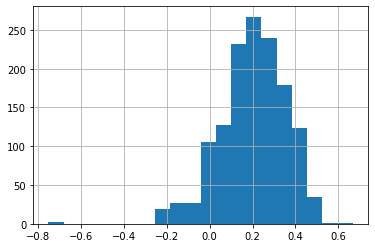

In [20]:
df_corr.sort_values('diff')['diff'].hist(bins=20)

In [47]:
df_corr.corr()

,src_idx,tgt_idx,src_size,tgt_size,max_dist,result,norm_dist,jaccard,diff
src_idx,1.000000,1.000000,-0.196744,-0.210190,-0.205919,-0.205558,0.141520,0.080593,0.010741
tgt_idx,1.000000,1.000000,-0.196744,-0.210190,-0.205919,-0.205558,0.141520,0.080593,0.010741
src_size,-0.196744,-0.196744,1.000000,0.957593,0.988494,0.927443,-0.486379,-0.243189,-0.081100
tgt_size,-0.210190,-0.210190,0.957593,1.000000,0.990157,0.953971,-0.561214,-0.280136,-0.094195
max_dist,-0.205919,-0.205919,0.988494,0.990157,1.000000,0.951346,-0.530898,-0.265201,-0.088847
result,-0.205558,-0.205558,0.927443,0.953971,0.951346,1.000000,-0.682421,-0.324243,-0.135973
norm_dist,0.141520,0.141520,-0.486379,-0.561214,-0.530898,-0.682421,1.000000,0.644443,-0.022111
jaccard,0.080593,0.080593,-0.243189,-0.280136,-0.265201,-0.324243,0.644443,1.000000,-0.778715
diff,0.010741,0.010741,-0.081100,-0.094195,-0.088847,-0.135973,-0.022111,-0.778715,1.000000
